In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
# generate cc using scala first

In [5]:
clusters=[]
with open('../input/stage2_graphcc2.txt') as f:
    for line in f:
        clusters.append(  line.split(","))
    

In [6]:
len(clusters)

5969

In [7]:
clusters_size=[len(u) for u in clusters]

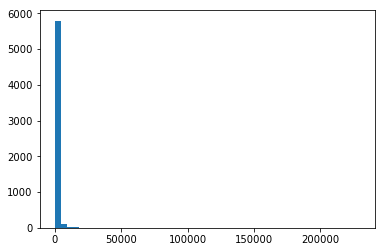

In [8]:
plt.hist(sorted(clusters_size),bins=50);

In [9]:
np.where(np.array(clusters_size)>10000)

(array([  29,   36,   56,   61,   84,  123,  165,  203,  212,  226,  241,
         271,  327,  334,  337,  365,  439,  566,  583,  594,  626,  631,
         674,  691,  718,  731,  756,  761,  774,  834,  843,  871,  875,
         912,  960,  964, 1019, 1076, 1093, 1166, 1218, 1421, 1495, 1518,
        1531, 1567, 1650, 1777, 1792, 1885, 2375, 2489, 2696, 2830, 2837,
        2926, 3237, 3467, 3654, 3830, 3926, 4119, 4502, 5542]),)

In [10]:
import networkx as nx

In [11]:
def find_simple_paths(g):
    #a=nx.simple_cycles(g)
    #assert(len(list(a))==0)
    degrees=g.degree()
    a=pd.Series(list(degrees.values())).value_counts()
    assert((a.index<=2).all())
    one_degree_nodes= [k for k,v in degrees.items() if v==1]
    paths=[]
    for u in one_degree_nodes:
        for v in one_degree_nodes:
            if u!=v:
                path=list(nx.all_simple_paths(g,u,v))
                if path:
                    paths.append(path)
    #print len(paths)
    return paths    

In [15]:
def analyze(cluster):
    nodes=[u.split(" ") for u in cluster]
    #print "#nodes", len(nodes)
    commons=(set([" ".join(u[:-1]) for u in nodes] + [" ".join(u[1:]) for u in nodes]))  
    #print "#commons", len(commons)
    
    srcnodes=pd.DataFrame([[" ".join(u[:-1])," ".join(u)] for u in nodes],columns=['core','dest'])
    destnodes=pd.DataFrame([[" ".join(u[1:])," ".join(u)] for u in nodes],columns=['core','src'])
    edges=pd.merge(srcnodes,destnodes, on='core',how='inner')
    edges=edges[['core','src','dest']]
    #print srcnodes.shape,destnodes.shape,edges.shape
    
    node_degrees= pd.concat([edges.src,edges.dest]).value_counts()
    #print "node degree", node_degrees.value_counts().to_dict()
    
    filterred_nodes= set(node_degrees[node_degrees<=2].index)
    #print "#filterred_nodes", len(filterred_nodes)
    
    single_edges=edges[(edges.src.isin(filterred_nodes)) & (edges.dest.isin(filterred_nodes))]
    G=nx.DiGraph()
    for _,s,d in single_edges.values:
        G.add_edge(s,d)
        
    degrees=G.degree()   
    #print pd.Series(list(degrees.values())).value_counts()
    
    #one_degree_nodes= [k for k,v in degrees.items() if v==1]
    paths=[]
    for cc in nx.weakly_connected_component_subgraphs(G):
        paths+=find_simple_paths(cc)
        
    pages=[]
    for p in paths:
        a=" ".join([u[0] for u in [v.split(" ") for v in p[0][:-1]]])
        pages.append(a+" " + p[0][-1])
    return pages

In [16]:
pages=[]
for i,cluster in enumerate(clusters):
    #print "Starts", i
    a=analyze(cluster)
    #print i,len(a)
    #print "End\n"
    pages+=a
    if i%30==0: print i,

0 30 60 90 120 150 180 210 240 270 300 330 360 390 420 450 480 510 540 570 600 630 660 690 720 750 780 810 840 870 900 930 960 990 1020 1050 1080 1110 1140 1170 1200 1230 1260 1290 1320 1350 1380 1410 1440 1470 1500 1530 1560 1590 1620 1650 1680 1710 1740 1770 1800 1830 1860 1890 1920 1950 1980 2010 2040 2070 2100 2130 2160 2190 2220 2250 2280 2310 2340 2370 2400 2430 2460 2490 2520 2550 2580 2610 2640 2670 2700 2730 2760 2790 2820 2850 2880 2910 2940 2970 3000 3030 3060 3090 3120 3150 3180 3210 3240 3270 3300 3330 3360 3390 3420 3450 3480 3510 3540 3570 3600 3630 3660 3690 3720 3750 3780 3810 3840 3870 3900 3930 3960 3990 4020 4050 4080 4110 4140 4170 4200 4230 4260 4290 4320 4350 4380 4410 4440 4470 4500 4530 4560 4590 4620 4650 4680 4710 4740 4770 4800 4830 4860 4890 4920 4950 4980 5010 5040 5070 5100 5130 5160 5190 5220 5250 5280 5310 5340 5370 5400 5430 5460 5490 5520 5550 5580 5610 5640 5670 5700 5730 5760 5790 5820 5850 5880 5910 5940


In [17]:
len(pages)

12730

In [18]:
a=np.array([len(u.split(" ")) for u in pages])

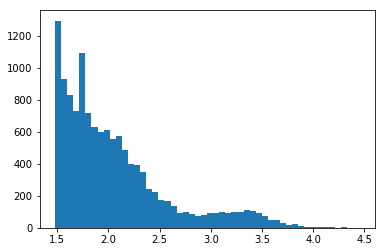

In [19]:
plt.hist(np.log10(a),bins=50);

In [20]:
with open("../input/stage2_pages.txt", 'w') as f:
    for p in pages:
        f.write(p.strip())
        f.write("\n")

In [21]:
len(pages)

12730